# Mount Rainier
Climbing Dataset.
Check it out here:
https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data

In [504]:
# dataframe manipulation
import pandas

# visualizations
import matplotlib.pyplot as pyplot
import seaborn

# algebra and calculus
import math

# linear algebra
import numpy

# regular expressions
import re

# dates and months and times
import datetime

# train_test_split is used for data splitting in model training
from sklearn.model_selection import train_test_split

# linear regression is used for predictions
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# statistics and mathematical analysis
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [505]:
# grabbing data
climbing_path = '../data/climbing_statistics.csv'
weather_path = '../data/rainier_weather.csv'

climbing = pandas.read_csv(climbing_path)
weather = pandas.read_csv(weather_path)

---

## Describe Data

In [506]:
def describe_data(dataframe):
	'''
	simply describes a dataset nicely by using
	various methods and print statements.
	'''
	print(
		'\n====================' \
		'\nDISPLAY HEAD OF DATA' \
		'\n====================' \
	)
	display(dataframe.head())
	display(dataframe.tail())
	print(
		'\n=====================' \
		'\nDISPLAY TYPES OF DATA' \
		'\n=====================' \
	)
	dataframe.info()
	print(
		'\n===================' \
		'\nMISSING DATA COUNTS' \
		'\n===================' \
	)
	print(dataframe.isnull().sum())
	print(dataframe['Date'].value_counts().nlargest(n=1).keys())
	print(
		'\n=====================' \
		'\nDISPLAY SHAPE OF DATA' \
		'\n=====================' \
	)
	print(dataframe.shape)
	print(
		'\n------------------' \
		'\nalso, take note of' \
		'\nany unique entries' \
		'\n------------------' \
	)
	print(dataframe['Date'].drop_duplicates().count())
	print(
		'\n===================' \
		'\nMOST FREQUENT DATES' \
		'\n===================' \
	)
	date = dataframe['Date'].value_counts().nlargest(n=1).keys()[0]
	display(dataframe[dataframe['Date'] == date])

In [507]:
describe_data(weather)


DISPLAY HEAD OF DATA


,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
459,9/27/2014,13.467083,33.318750,60.200417,7.140917,116.294583,227.597125
460,9/26/2014,13.532500,28.238333,100.000000,0.897625,259.645833,114.400833
461,9/25/2014,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917
462,9/24/2014,13.168750,29.702917,100.000000,45.915000,278.054167,37.873708
463,9/23/2014,13.056667,32.857333,100.000000,65.110667,254.273333,16.593800



DISPLAY TYPES OF DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
Date                     464 non-null object
Battery Voltage AVG      464 non-null float64
Temperature AVG          464 non-null float64
Relative Humidity AVG    464 non-null float64
Wind Speed Daily AVG     464 non-null float64
Wind Direction AVG       464 non-null float64
Solare Radiation AVG     464 non-null float64
dtypes: float64(6), object(1)
memory usage: 25.5+ KB

MISSING DATA COUNTS
Date                     0
Battery Voltage AVG      0
Temperature AVG          0
Relative Humidity AVG    0
Wind Speed Daily AVG     0
Wind Direction AVG       0
Solare Radiation AVG     0
dtype: int64
Index(['5/7/2015'], dtype='object')

DISPLAY SHAPE OF DATA
(464, 7)

------------------
also, take note of
any unique entries
------------------
464

MOST FREQUENT DATES


,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
237,5/7/2015,13.668333,25.247083,19.201667,10.208875,150.935833,16.210417


In [508]:
describe_data(climbing)


DISPLAY HEAD OF DATA


,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


,Date,Route,Attempted,Succeeded,Success Percentage
4072,1/16/2014,Little Tahoma,2,0,0.000000
4073,1/6/2014,Disappointment Cleaver,8,0,0.000000
4074,1/6/2014,Disappointment Cleaver,8,0,0.000000
4075,1/5/2014,Disappointment Cleaver,2,0,0.000000
4076,1/4/2014,Gibralter Ledges,3,2,0.666667



DISPLAY TYPES OF DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
Date                  4077 non-null object
Route                 4077 non-null object
Attempted             4077 non-null int64
Succeeded             4077 non-null int64
Success Percentage    4077 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 159.3+ KB

MISSING DATA COUNTS
Date                  0
Route                 0
Attempted             0
Succeeded             0
Success Percentage    0
dtype: int64
Index(['7/11/2014'], dtype='object')

DISPLAY SHAPE OF DATA
(4077, 5)

------------------
also, take note of
any unique entries
------------------
391

MOST FREQUENT DATES


,Date,Route,Attempted,Succeeded,Success Percentage
2942,7/11/2014,glacier only - no summit attempt,3,0,0.000000
2943,7/11/2014,Emmons-Winthrop,2,2,1.000000
2944,7/11/2014,Emmons-Winthrop,4,4,1.000000
2945,7/11/2014,Emmons-Winthrop,3,0,0.000000
2946,7/11/2014,Disappointment Cleaver,4,0,0.000000
2947,7/11/2014,Emmons-Winthrop,2,2,1.000000
2948,7/11/2014,Emmons-Winthrop,2,0,0.000000
2949,7/11/2014,Disappointment Cleaver,3,3,1.000000
2950,7/11/2014,Emmons-Winthrop,6,6,1.000000
2951,7/11/2014,Ptarmigan RIngraham Directge,3,3,1.000000


### Description Overview
Cool stuff!
An interesting point about each entry is that the dates are unique for the `weather` data&hellip;
Buuuut they are decidely *not* unqiue for the `climbing` data.
This leads me to believe that each row for the `climbing` data represents a team of people, collaborating to climb this precipice.
That's very exciting; we can actually determine whether larger groups have higher success rates.

---

## Clean Data

In [509]:
# dates should be kept as a date objects.
weather['Date'] = pandas.to_datetime(weather['Date'])
climbing['Date'] = pandas.to_datetime(climbing['Date'])

# rename ambiguous columns
climbing['Group Size'] = climbing['Attempted']
climbing['Successes'] = climbing['Succeeded']
climbing = climbing.drop([
	'Attempted',
	'Succeeded'
], 1)
weather['Solar Radiation AVG'] = weather['Solare Radiation AVG']
weather = weather.drop(['Solare Radiation AVG'], 1)

# recalculate columns
climbing = climbing.drop(['Success Percentage'], 1)
climbing['Success Rate'] = climbing['Successes']/climbing['Group Size']

### Merge Data

In [510]:
# we need to join the weather data with the climbing data.
# we want to put the weather for the respective dates within the climbing data.
# weather data without any attempts can be deleted or kept aside.
# same with climbing data on days without weather reports. Also 
data = pandas.merge(climbing, weather, how='inner', on=['Date'])

In [511]:
describe_data(data)


DISPLAY HEAD OF DATA


,Date,Route,Group Size,Successes,Success Rate,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,2015-11-21,Disappointment Cleaver,3,0,0.0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,2015-10-15,Disappointment Cleaver,2,0,0.0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,2015-10-13,Little Tahoma,8,0,0.0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,2015-10-09,Disappointment Cleaver,2,0,0.0,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292


,Date,Route,Group Size,Successes,Success Rate,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
1890,2014-09-26,Disappointment Cleaver,3,0,0.0,13.532500,28.238333,100.000000,0.897625,259.645833,114.400833
1891,2014-09-25,Disappointment Cleaver,2,2,1.0,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917
1892,2014-09-25,Disappointment Cleaver,12,6,0.5,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917
1893,2014-09-24,Disappointment Cleaver,12,0,0.0,13.168750,29.702917,100.000000,45.915000,278.054167,37.873708
1894,2014-09-23,Disappointment Cleaver,11,0,0.0,13.056667,32.857333,100.000000,65.110667,254.273333,16.593800



DISPLAY TYPES OF DATA
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 1894
Data columns (total 11 columns):
Date                     1895 non-null datetime64[ns]
Route                    1895 non-null object
Group Size               1895 non-null int64
Successes                1895 non-null int64
Success Rate             1895 non-null float64
Battery Voltage AVG      1895 non-null float64
Temperature AVG          1895 non-null float64
Relative Humidity AVG    1895 non-null float64
Wind Speed Daily AVG     1895 non-null float64
Wind Direction AVG       1895 non-null float64
Solar Radiation AVG      1895 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 177.7+ KB

MISSING DATA COUNTS
Date                     0
Route                    0
Group Size               0
Successes                0
Success Rate             0
Battery Voltage AVG      0
Temperature AVG          0
Relative Humidity AVG    0
Wind Speed Daily AVG     0
Wind

,Date,Route,Group Size,Successes,Success Rate,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
895,2015-07-03,Disappointment Cleaver,3,0,0.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
896,2015-07-03,Disappointment Cleaver,3,3,1.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
897,2015-07-03,Disappointment Cleaver,5,4,0.800000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
898,2015-07-03,Disappointment Cleaver,4,0,0.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
899,2015-07-03,Disappointment Cleaver,3,3,1.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
900,2015-07-03,Disappointment Cleaver,2,2,1.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
901,2015-07-03,Disappointment Cleaver,2,0,0.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
902,2015-07-03,Disappointment Cleaver,3,3,1.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
903,2015-07-03,Disappointment Cleaver,3,0,0.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167
904,2015-07-03,Disappointment Cleaver,4,4,1.000000,13.423333,55.1375,20.559417,0.753458,90.534583,357.341167


### Renumerate Dates

In [512]:
def renumerate_dates(dataframe):
	# move "Date" column to end of the dataframe
	cols = dataframe.columns.tolist()
	cols = cols[1:] + cols[:1]
	dataframe = dataframe[cols]
	# apply date-data extractor function
	dataframe = dataframe.apply(extract_date_data, axis=1)
	# move "Date", "Year", and "Day of Year" to front
	cols = dataframe.columns.tolist()
	cols = cols[-3:] + cols[:-3]
	dataframe = dataframe[cols]
	# return modified dataframe object
	return dataframe

def extract_date_data(row):
	# find year from date
	row['Year'] = row['Date'].year
	# find day of year from date
	row['Day of Year'] = row['Date'].timetuple().tm_yday
	return row

data = renumerate_dates(data)
weather = renumerate_dates(weather)
climbing = renumerate_dates(climbing)

In [513]:
data.head(20)

,Date,Year,Day of Year,Route,Group Size,Successes,Success Rate,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,2015-11-27,2015,331,Disappointment Cleaver,2,0,0.000000,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,2015-11-21,2015,325,Disappointment Cleaver,3,0,0.000000,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,2015-10-15,2015,288,Disappointment Cleaver,2,0,0.000000,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,2015-10-13,2015,286,Little Tahoma,8,0,0.000000,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,2015-10-09,2015,282,Disappointment Cleaver,2,0,0.000000,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292
5,2015-10-03,2015,276,Disappointment Cleaver,10,0,0.000000,13.577500,31.822917,62.337083,13.125042,153.931667,196.375208
6,2015-10-03,2015,276,Disappointment Cleaver,2,0,0.000000,13.577500,31.822917,62.337083,13.125042,153.931667,196.375208
7,2015-10-02,2015,275,Kautz Glacier,2,0,0.000000,13.505000,36.064167,47.017375,6.445917,247.318333,176.265542
8,2015-10-02,2015,275,Disappointment Cleaver,2,0,0.000000,13.505000,36.064167,47.017375,6.445917,247.318333,176.265542
9,2015-09-30,2015,273,Disappointment Cleaver,2,0,0.000000,13.483333,38.729583,57.369583,11.300750,216.934167,202.812750


### Quantifying Non-Numerical Data

In [514]:
# using one-hot encoding
# ==NOTE==
# http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
data = pandas.get_dummies(data,prefix=['Route'])

In [515]:
# clean encoding format
cols = data.columns.tolist()
for old_name in cols:
	new_name = re.sub('Route_', 'Route: ', old_name)
	if old_name != new_name:
		data[new_name] = data[old_name]
		data = data.drop([old_name], 1)

In [516]:
# delete non-numerical data
data = data.drop([
	'Successes',
	'Date'
], 1)

---

## Correlation Heatmap

In [517]:
# ==NOTE==
# sample code used from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

def heatmap(data):
	# set up grid style
	seaborn.set(style='white')

	# compute the correlation matrix
	correlation = data.corr().abs()

	# generate a mask for the upper triangle
	mask = numpy.zeros_like(correlation, dtype=numpy.bool)
	mask[numpy.triu_indices_from(mask)] = True

	# set up the matplotlib figure
	pyplot.subplots(figsize=(12, 8))

	# generate a custom diverging colormap
	cmap = seaborn.cubehelix_palette(light=1, as_cmap=True)

	# draw the heatmap with the mask and correct aspect ratio
	seaborn.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=0, square=True)

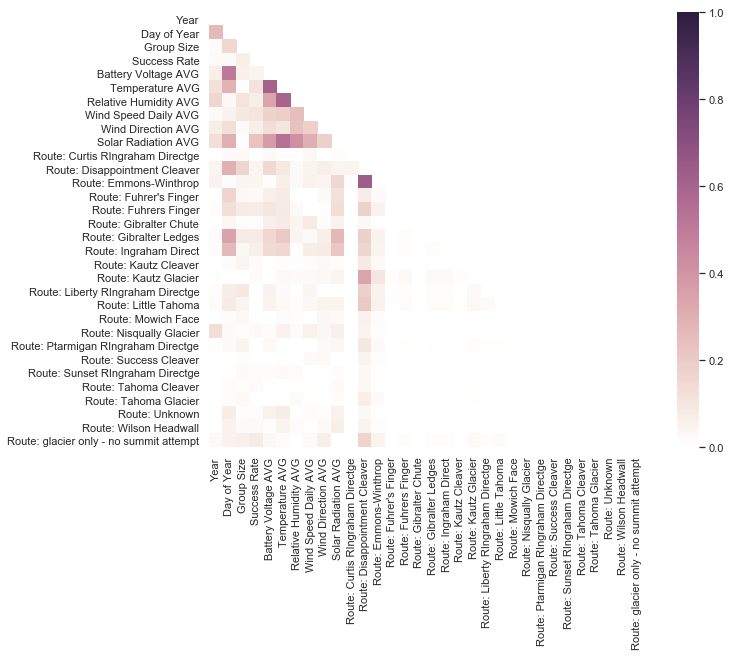

In [518]:
heatmap(data)

Some of the data seems redundent, or highly coorelated.
For example, we really do not need to know the number of people who succeeded, nor do we need to know the number of people who attempted.
What really matters is the success rate.

Something strange that I personally have noticed is that there is not a specific way in this data to determine whether it was raining/snowing on a particular day.
One would think this is a particularly important factor when considering the weather in any particular study.

Perhaps this was not an oversight.
Perhaps it never or always rains on mount rainier.
It is something to look into in the future, when I revisit this dataset.

---

## Train/Test Data Split

In [519]:
# set up standard naming convention for training:
X = data.drop(['Success Rate'], 1)
Y = data['Success Rate']

# `test_ratio` is explicitly stated in the assignment details.
# it is the amount of testing data vs training data we have.
test_ratio = 0.25

In [520]:
display(Y.head())
display(X.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Success Rate, dtype: float64

,Year,Day of Year,Group Size,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG,Route: Curtis RIngraham Directge,...,Route: Mowich Face,Route: Nisqually Glacier,Route: Ptarmigan RIngraham Directge,Route: Success Cleaver,Route: Sunset RIngraham Directge,Route: Tahoma Cleaver,Route: Tahoma Glacier,Route: Unknown,Route: Wilson Headwall,Route: glacier only - no summit attempt
0,2015,331,2,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,325,3,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,288,2,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,286,8,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,282,2,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,0,...,0,0,0,0,0,0,0,0,0,0


In [521]:
# `test_group` is the actual number of test data rows.
test_group = math.ceil(test_ratio * len(X))

# randomly pick `test_size` number of data for testing.
X_test_check = X[:test_group]
Y_test_check = Y[:test_group]
# leave the rest for training.
X_train_check = X[test_group:]
Y_train_check = Y[test_group:]

In [522]:
# ==NOTE==
# all this stuff done in the above cell can be distilled to this:
X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size=test_ratio, random_state=0)

In [523]:
# we can ensure all this is equivalent by comparing some items:
print(len(X_test_check), len(X_test))
print(len(Y_test_check), len(Y_test))
print(len(X_train_check), len(X_train))
print(len(Y_train_check), len(Y_train))

# assertion statements will help check for issues later:
assert(len(X_train) == len(Y_train) == len(X_train_check) == len(Y_train_check))
assert(len(X_test) == len(Y_test) == len(X_test_check) == len(Y_test_check))

474 474
474 474
1421 1421
1421 1421


In [524]:
# symantic (but otherwise pointless) cleanup
del X_test_check
del Y_test_check
del X_train_check
del Y_train_check

---

## Normalize Data

In [525]:
# fit transform on training data
# transform on testing data
scaler = StandardScaler()

X_train = pandas.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pandas.DataFrame(scaler.transform(X_test), columns = X_test.columns)

/Users/nolansmac/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nolansmac/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/nolansmac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


---

## Fit Data to Model

In [537]:
# get model
model = LinearRegression()

# fit model
model.fit(X_train, Y_train)

# create prediction model, named Z_train and Z_test
# Z stands for Predictions.
# therefore, if my model is good, 
# Z_test and Y_test should be very close!!!
Z_test  = model.predict(X_test)
Z = model.predict(X)

R2 = r2_score(Y_test, Z_test)
MSE = mean_squared_error(Y_test, Z_test)
print(f"R^2 Score: {R2}")
print(f"MSE Score: {MSE}")

R^2 Score: -5.3785201313813184e+22
MSE Score: 1.1317302036335077e+22


In [538]:
# grab prediction and reality models
# prediction = Z_test
# correction = Y_test.values.T

# # manually compare a few values
# for predict, correct in zip(prediction, correction):
# 	print(
# 		f'{"%.2f" % predict}, {"%.2f" % correct}' \
# 		f' | diff: {"%.2f" % abs(predict - correct)}'
# 	)